In [1]:
%matplotlib inline

from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

num_samples = 100
x = np.sort(np.random.rand(1, num_samples) * 500)
y = np.copy(x)

In [2]:
noise = np.random.normal(0, 1, (1, num_samples))
y_noise = np.copy(y) + noise * 30

In [3]:
y_noise[np.where(x <= 40)] *= 10
y_noise[np.where((x >= 200) & (x <= 230))] *= -4
y_noise[np.where((x >= 400) & (x <= 430))] *= 4

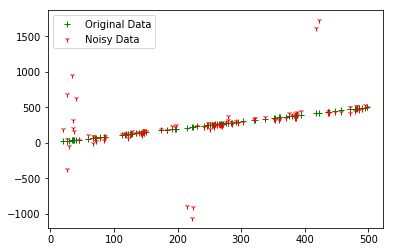

In [4]:
original_data_plot, *od = plt.plot(x, y, 'g+')
noisy_data_ploy, *nd = plt.plot(x, y_noise, 'r1')
plt.legend([original_data_plot, noisy_data_ploy], ['Original Data', 'Noisy Data'])
plt.show()

In [5]:
lm = linear_model.LinearRegression()
num_train = np.floor(num_samples * 0.6).astype(int)
x_train = x[0, :num_train].reshape(-1, 1)
y_train = y_noise[0, :num_train].reshape(-1, 1)
x_test = x[0, num_train:].reshape(-1, 1)
y_test = y_noise[0, num_train:].reshape(-1, 1)
lm.fit(x_train, y_train)
print(lm.coef_, lm.intercept_)

[[-0.32433543]] [173.88476795]


In [6]:
original_data_plot, *od = plt.plot(x, y_noise, 'r1')
predicted_data_plot, *pd = plt.plot(x, x * lm.coef_ + lm.intercept_, 'b.')
plt.legend([original_data_plot, predicted_data_plot], ['Original Data', 'Predicted Data'])
plt.annotate('outliers', xy=(240, -800), xytext=(300,-600), arrowprops=dict(linewidth=0.1))
plt.annotate('outliers', xy=(400, 1600), xytext=(270,1400), arrowprops=dict(linewidth=0.1))
plt.show()

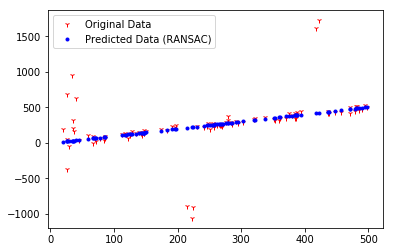

In [7]:
rlm = linear_model.RANSACRegressor(linear_model.LinearRegression())
rlm.fit(x_train, y_train)
original_data_plot, *od = plt.plot(x, y_noise, 'r1')
predicted_data_plot, *pd = plt.plot(x, x * rlm.estimator_.coef_ + rlm.estimator_.intercept_, 'b.')
plt.legend([original_data_plot, predicted_data_plot], ['Original Data', 'Predicted Data (RANSAC)'])
plt.show()